<a href="https://colab.research.google.com/github/kirath2205/Final-Year-Project/blob/main/Test_bench.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras,os
import tensorflow as tf
from keras.models import Sequential,Model
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D , Dropout
import numpy as np
from tensorflow import keras
from keras.initializers import glorot_uniform
from keras import applications
from tensorflow.keras.applications.resnet50 import ResNet50 , preprocess_input
from keras import regularizers


In [2]:
!pip install Keras-applications


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
def select_dataset(index):

  if(index==1):
    fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
    (X_train, y_train), (X_test, y_test) = fashion_mnist

  elif(index==2):
    cifar_10 = tf.keras.datasets.cifar10.load_data()
    (X_train, y_train), (X_test, y_test) = cifar_10
  
  elif(index==3):
    cifar_100 = tf.keras.datasets.cifar100.load_data()
    (X_train, y_train), (X_test, y_test) = cifar_100
    print(len(X_train))

    
  return X_train,y_train,X_test,y_test

In [4]:
def normalize(X_train,X_test):
    #this function normalize inputs for zero mean and unit variance
    # it is used when training a model.
    # Input: training set and test set
    # Output: normalized training set and test set according to the trianing set statistics.
    mean = np.mean(X_train,axis=(0,1,2,3))
    std = np.std(X_train, axis=(0, 1, 2, 3))
    print(mean)
    print(std)
    X_train = (X_train-mean)/(std+1e-7)
    X_test = (X_test-mean)/(std+1e-7)
    return X_train, X_test

def pre_processing_fashion_mnist(X_train,y_train,X_test,y_test,image_channel):
  img_width = X_train.shape[1]
  img_height = X_train.shape[2]
  input_shape = (img_width, img_height, image_channel)
  
  # normalize data
  X_train, X_test = X_train / 255, X_test / 255

  # reshape input 
  X_train = X_train.reshape(X_train.shape[0], *input_shape)
  X_test = X_test.reshape(X_test.shape[0], *input_shape)

  # one-hot
  y_train = tf.keras.utils.to_categorical(y_train)
  y_test = tf.keras.utils.to_categorical(y_test)

  return X_train,y_train,X_test,y_test,input_shape

def pre_processing_cifar10(X_train,y_train,X_test,y_test,image_channel):
  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')

  y_train = keras.utils.to_categorical(y_train)
  y_test = keras.utils.to_categorical(y_test)

  X_train = preprocess_input(X_train)
  X_test = preprocess_input(X_test)

  img_width = X_train[0].shape[0]
  img_height = X_train[0].shape[1]
  image_channel = image_channel

  input_shape=(img_width,img_height,image_channel) 
  print(input_shape)
  X_train , X_test = normalize(X_train , X_test)
  return X_train,y_train,X_test,y_test,input_shape
  
def pre_processing_cifar100(X_train,y_train,X_test,y_test,image_channel):
  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')
  X_train = preprocess_input(X_train)
  X_test = preprocess_input(X_test)

  y_train = keras.utils.to_categorical(y_train)
  y_test = keras.utils.to_categorical(y_test)

  img_width = X_train[0].shape[0]
  img_height = X_train[0].shape[1]
  image_channel = image_channel

  input_shape=(img_width,img_height,image_channel) 
  print(input_shape)
  return X_train,y_train,X_test,y_test,input_shape

In [5]:
def define_model_vgg16(image_shape,total_classes):
  print(image_shape[2])

  model = Sequential()
  weight_decay = 0.0005
  learning_rate = 0.1
  lr_decay = 1e-6
  lr_drop = 20
  model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=image_shape,kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))

  model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))


  model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(Dropout(0.5))
  model.add(Dense(total_classes))
  model.add(Activation('softmax'))
  sgd = keras.optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)
  model.compile(optimizer=sgd, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
  
  return model

def define_model_standard_cnn(image_shape,total_classes):
  initializer = tf.keras.initializers.he_uniform()
  model = Sequential()
  model.add(Conv2D(32,(3,3), activation = 'relu',  padding = 'same', input_shape = image_shape))
  model.add(Conv2D(32,(3,3), activation = 'relu',  padding = 'same'))
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.2))  
  model.add(Conv2D(64,(3,3), activation = 'relu',  padding = 'same'))
  model.add(Conv2D(64,(3,3), activation = 'relu',  padding = 'same'))
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(128,(3,3), activation = 'relu',  padding = 'same'))
  model.add(Conv2D(128,(3,3), activation = 'relu',  padding = 'same'))
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation = 'relu'))
  model.add(Dense(total_classes, activation = 'softmax'))
  opt = keras.optimizers.SGD(learning_rate=0.1 , momentum=0.9)
  model.compile(optimizer=opt,loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])
  return model



In [6]:

def identity_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

def convolutional_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same', strides = (2,2))(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Processing Residue with conv(1,1)
    x_skip = tf.keras.layers.Conv2D(filter, (1,1), strides = (2,2))(x_skip)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

def ResNet34(shape, classes):
    learning_rate = 0.1
    lr_decay = 1e-6
    # Step 1 (Setup Input Layer)
    x_input = tf.keras.layers.Input(shape)
    x = tf.keras.layers.ZeroPadding2D((3, 3))(x_input)
    # Step 2 (Initial Conv layer along with maxPool)
    x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    # Define size of sub-blocks and initial filter size
    block_layers = [3, 4, 6, 3]
    filter_size = 64
    # Step 3 Add the Resnet Blocks
    for i in range(4):
        if i == 0:
            # For sub-block 1 Residual/Convolutional block not needed
            for j in range(block_layers[i]):
                x = identity_block(x, filter_size)
        else:
            # One Residual/Convolutional Block followed by Identity blocks
            # The filter size will go on increasing by a factor of 2
            filter_size = filter_size*2
            x = convolutional_block(x, filter_size)
            for j in range(block_layers[i] - 1):
                x = identity_block(x, filter_size)
    # Step 4 End Dense Network
    x = tf.keras.layers.AveragePooling2D((2,2), padding = 'same')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation = 'relu')(x)
    x = tf.keras.layers.Dense(classes, activation = 'softmax')(x)
    model = tf.keras.models.Model(inputs = x_input, outputs = x, name = "ResNet34")
    sgd = keras.optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [10]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
def train_model_vgg16(X_train,y_train,X_test,y_test,epochs=10,batch_size=128):
  
  callbacks = [ 
    tf.keras.callbacks.ModelCheckpoint('best_model_vgg16', monitor='val_accuracy', verbose=1, save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau( factor = 0.9, patience = 7, min_lr = 0.000001, verbose = 1 ),
    tf.keras.callbacks.EarlyStopping(monitor = 'val_loss' , patience = 100)
  ]
  history=model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size,callbacks = callbacks, verbose = 1,validation_data=(X_test,y_test))
  return history

def train_model_standard_cnn(X_train,y_train,X_test,y_test,epochs=10,batch_size=64):
  callbacks = [ 
    tf.keras.callbacks.ModelCheckpoint('best_model_standard_cnn', monitor='val_accuracy', verbose=1, save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau( factor = 0.9, patience = 3, min_lr = 0.000001, verbose = 1 ),
    tf.keras.callbacks.EarlyStopping(monitor = 'val_loss' , patience = 15)
  ]
  history=model.fit(X_train , y_train , epochs = epochs , validation_data=(X_test,y_test),batch_size=batch_size , callbacks = callbacks)
  return history


def train_model_resnet34(X_train,y_train,X_test,y_test,epochs=10,batch_size=64):
  callbacks = [ 
    tf.keras.callbacks.ModelCheckpoint('best_model_resnet50', monitor='val_accuracy', verbose=1, save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau( factor = 0.9, patience = 7, min_lr = 0.000001, verbose = 1 ),
    tf.keras.callbacks.EarlyStopping(monitor = 'val_loss' , patience = 50)
  ]
  history=model.fit(X_train , y_train , epochs = epochs , validation_data=(X_test,y_test),batch_size= 128 , callbacks = callbacks)
  return history

In [8]:
def make_prediction(model,X_test,index):

  return model.predict(X_test(index))


In [12]:

'''

X_train,y_train,X_test,y_test=select_dataset(2)
X_train,y_train,X_test,y_test,image_shape=pre_processing_cifar10(X_train,y_train,X_test,y_test,3)
model=define_model_standard_cnn(image_shape,10)
history_cnn_model = train_model_standard_cnn(X_train,y_train,X_test,y_test,epochs=100)
model.save('Desktop/cnn_model_cifar10.h5')

X_train,y_train,X_test,y_test=select_dataset(2)
X_train,y_train,X_test,y_test,image_shape=pre_processing_cifar10(X_train,y_train,X_test,y_test,3)
model=ResNet34(image_shape,10)
history_resnet=train_model_resnet34(X_train,y_train,X_test,y_test,epochs=100)
model.save('Desktop/resnet_cifar10.h5') '''

X_train,y_train,X_test,y_test=select_dataset(3)
X_train,y_train,X_test,y_test,image_shape=pre_processing_cifar100(X_train,y_train,X_test,y_test,3)
model=define_model_vgg16(image_shape,100)
history_vgg16=train_model_vgg16(X_train,y_train,X_test,y_test,epochs=400)
model.save('Desktop/vgg16_cifar100.h5')



50000
(32, 32, 3)
3
Epoch 1/400
391/391 [==============================] - ETA: 0s - loss: 18.9348 - accuracy: 0.0261
Epoch 00001: val_accuracy improved from -inf to 0.01380, saving model to best_model_vgg16
INFO:tensorflow:Assets written to: best_model_vgg16/assets
391/391 [==============================] - 17s 43ms/step - loss: 18.9348 - accuracy: 0.0261 - val_loss: 14.6029 - val_accuracy: 0.0138 - lr: 0.1000
Epoch 2/400
389/391 [============================>.] - ETA: 0s - loss: 10.9565 - accuracy: 0.0465
Epoch 00002: val_accuracy improved from 0.01380 to 0.01990, saving model to best_model_vgg16
INFO:tensorflow:Assets written to: best_model_vgg16/assets
391/391 [==============================] - 16s 41ms/step - loss: 10.9467 - accuracy: 0.0465 - val_loss: 9.9447 - val_accuracy: 0.0199 - lr: 0.1000
Epoch 3/400
389/391 [============================>.] - ETA: 0s - loss: 7.1923 - accuracy: 0.0648
Epoch 00003: val_accuracy improved from 0.01990 to 0.05000, saving model to best_model_vgg1

In [11]:
X_train,y_train,X_test,y_test=select_dataset(3)
X_train,y_train,X_test,y_test,image_shape=pre_processing_cifar100(X_train,y_train,X_test,y_test,3)
model=ResNet34(image_shape,100)
history_resnet=train_model_resnet34(X_train,y_train,X_test,y_test,epochs=300)
model.save('Desktop/resnet_cifar100.h5')

50000
(32, 32, 3)
Epoch 1/300
390/391 [============================>.] - ETA: 0s - loss: 4.4974 - accuracy: 0.0231
Epoch 00001: val_accuracy improved from -inf to 0.02860, saving model to best_model_resnet50
INFO:tensorflow:Assets written to: best_model_resnet50/assets
391/391 [==============================] - 20s 51ms/step - loss: 4.4972 - accuracy: 0.0231 - val_loss: 4.3085 - val_accuracy: 0.0286 - lr: 0.1000
Epoch 2/300
389/391 [============================>.] - ETA: 0s - loss: 4.1364 - accuracy: 0.0458
Epoch 00002: val_accuracy improved from 0.02860 to 0.04930, saving model to best_model_resnet50
INFO:tensorflow:Assets written to: best_model_resnet50/assets
391/391 [==============================] - 20s 51ms/step - loss: 4.1356 - accuracy: 0.0459 - val_loss: 4.2191 - val_accuracy: 0.0493 - lr: 0.1000
Epoch 3/300
390/391 [============================>.] - ETA: 0s - loss: 3.8552 - accuracy: 0.0862
Epoch 00003: val_accuracy improved from 0.04930 to 0.10660, saving model to best_model

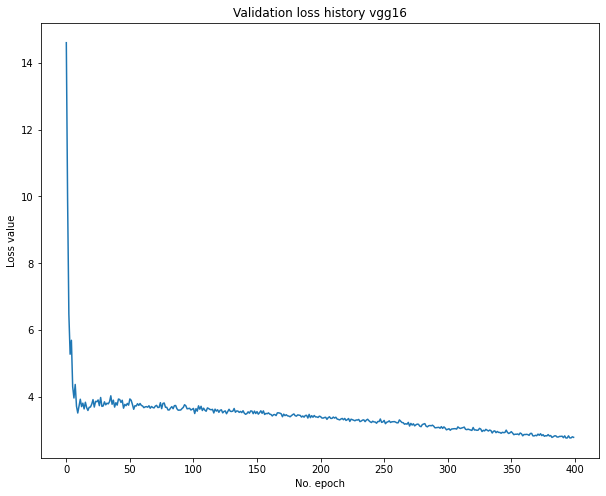

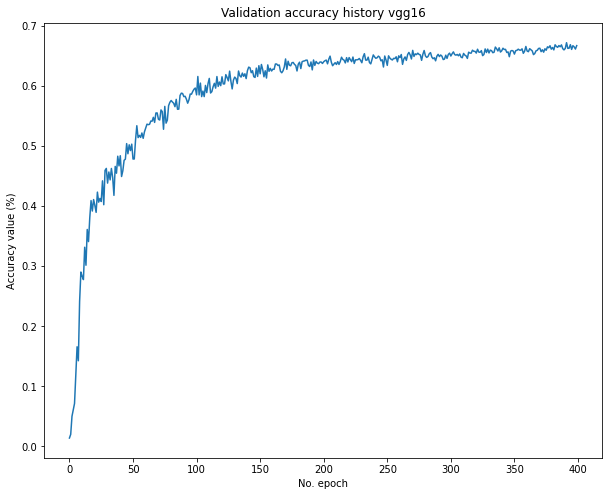

In [13]:
import matplotlib.pyplot as plt

''' 

# Visualize history
# Plot history: Loss
plt.figure(figsize = (10,8))
plt.plot(history_cnn_model.history['val_loss'])
plt.title('Validation loss history cnn_model')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.figure(figsize = (10,8))
plt.plot(history_cnn_model.history['val_accuracy'])
plt.title('Validation accuracy history cnn_model')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()
'''
'''
print()
# Visualize history
# Plot history: Loss
plt.figure(figsize = (10,8))
plt.plot(history_resnet.history['val_loss'])
plt.title('Validation loss history resnet')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.figure(figsize = (10,8))
plt.plot(history_resnet.history['val_accuracy'])
plt.title('Validation accuracy history resnet')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()
'''
# Visualize history
# Plot history: Loss
plt.figure(figsize = (10,8))
plt.plot(history_vgg16.history['val_loss'])
plt.title('Validation loss history vgg16')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()
print()
# Plot history: Accuracy
plt.figure(figsize = (10,8))
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Validation accuracy history vgg16')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [ ]:
!pip freeze > requirements.txt

In [ ]:
'''X_train,y_train,X_test,y_test=select_dataset(1)
X_train,y_train,X_test,y_test,image_shape=pre_processing_fashion_mnist(X_train,y_train,X_test,y_test,1)
model=define_model_standard_cnn(image_shape,10)
history_cnn_model_mnist = train_model_standard_cnn(X_train,y_train,X_test,y_test,epochs=100)
model.save('Desktop/cnn_model_mnist.h5')'''
'''
X_train,y_train,X_test,y_test=select_dataset(1)
X_train,y_train,X_test,y_test,image_shape=pre_processing_fashion_mnist(X_train,y_train,X_test,y_test,1)
model=ResNet34(image_shape,10)
history_resnet_mnist =train_model_resnet34(X_train,y_train,X_test,y_test,epochs=100)
model.save('Desktop/resnet_mnist.h5')'''
'''
X_train,y_train,X_test,y_test=select_dataset(1)
X_train,y_train,X_test,y_test,image_shape=pre_processing_fashion_mnist(X_train,y_train,X_test,y_test,1)
model=define_model_vgg16(image_shape,10)
history_vgg16_mnist=train_model_vgg16(X_train,y_train,X_test,y_test,epochs=100)
model.save('Desktop/vgg16_mnist.h5')'''

In [ ]:
import matplotlib.pyplot as plt



# Visualize history
# Plot history: Loss
plt.figure(figsize = (10,8))
plt.plot(history_cnn_model_mnist.history['val_loss'])
plt.title('Validation loss history cnn_model')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.figure(figsize = (10,8))
plt.plot(history_cnn_model_mnist.history['val_accuracy'])
plt.title('Validation accuracy history cnn_model')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

print()
# Visualize history
# Plot history: Loss
plt.figure(figsize = (10,8))
plt.plot(history_resnet_mnist.history['val_loss'])
plt.title('Validation loss history resnet')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.figure(figsize = (10,8))
plt.plot(history_resnet_mnist.history['val_accuracy'])
plt.title('Validation accuracy history resnet')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

# Visualize history
# Plot history: Loss
plt.figure(figsize = (10,8))
plt.plot(history_vgg16_mnist.history['val_loss'])
plt.title('Validation loss history vgg16')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()
print()
# Plot history: Accuracy
plt.figure(figsize = (10,8))
plt.plot(history_vgg16_mnist.history['val_accuracy'])
plt.title('Validation accuracy history vgg16')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()